In [1]:
# importing the dependencies
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from darkflow.net.build import TFNet
# the cfg file and weights location
model = {"model": "cfg/yolov2.cfg", 
           "load": "yolov2.weights", 
           "threshold": 0.4}

tfnet = TFNet(model) # creating the object

imgcv = cv2.imread("./sample_img/sample_horses.jpg",cv2.IMREAD_COLOR) # read the image 
result = tfnet.return_predict(imgcv) # predict the classes and cordinates of the oject
print(result)

Parsing ./cfg/yolov2.cfg
Parsing cfg/yolov2.cfg
Loading yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.5924623012542725s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76

(512, 773, 3)


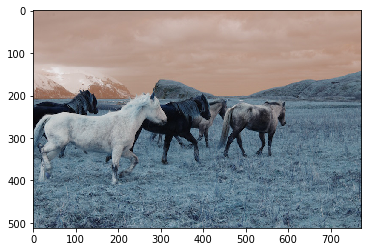

In [8]:

plt.imshow(imgcv) # image before detection
print(imgcv.shape) # shape of the image

In [46]:
# This is for draw the bounding box around the predicted classes 
tl = []
br = []
labels = []

for i in range(len(result)):
    topleft = (result[i]['topleft']['x'],result[i]['topleft']['y']) # to get the topleft cordinates in a tuple
    bottomright = (result[i]['bottomright']['x'],result[i]['bottomright']['y']) # to get the bottomright cordinates in a tuple
    label = (result[i]['label']) # to get the labels from the predicted class ,it's in the form of dictionary
    tl.append(topleft) # append the tuples in the list
    br.append(bottomright)
    labels.append(label)
    img2 = cv2.rectangle(imgcv,tl[i],br[i],(0,255,255),5) # draw rectangles around the classes here we pass image,topleft cordinates ,bottomright cordinates ,which colour box we want and how thik the line
    img2 = cv2.putText(imgcv,labels[i],tl[i],cv2.FONT_HERSHEY_COMPLEX,1, (0 ,0 ,0), 2) # putting the label on the topleft corner

In [47]:
# just for checking
print(tl)
print(br)
print(labels)
labels[0]

[(252, 196), (435, 210), (6, 193)]
[(434, 371), (603, 349), (304, 410)]
['horse', 'horse', 'horse']


'horse'

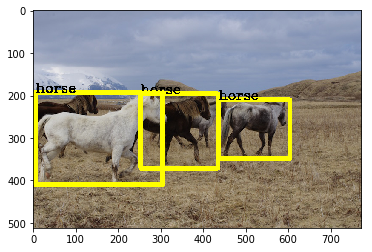

In [48]:
img3 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB) # convert the image in RGB format
plt.imshow(img3) # plot the image